In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from dynadojo.systems.lorenz import LorenzSystem
from dynadojo.utils.lds import plot
from dynadojo.baselines.sindy import SINDy
import numpy as np

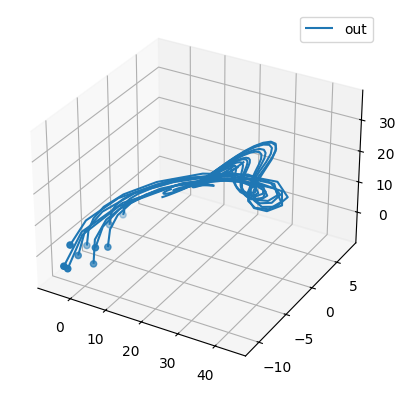

In [36]:
latent_dim = 3
embed_dim = latent_dim
n = 50
test_size = 10
timesteps = 50
system = LorenzSystem(latent_dim, embed_dim, noise_scale=0)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((test_size, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
# fig , ax = plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=test_size)
fig , ax = plot([y], target_dim=min(latent_dim, 3), labels=["out"], max_lines=test_size)

ValueError: operands could not be broadcast together with shapes (10,50,3) (10,500,3) 

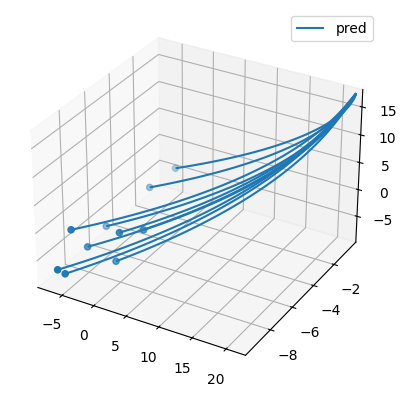

In [41]:
sindy = SINDy(embed_dim, timesteps, max_control_cost=0, seed=100)
sindy.fit(x)
y_pred = sindy.predict(y[:, 0], timesteps)
ax = None
fig, ax = plot([y_pred], target_dim=min(3, latent_dim), labels=["pred"], max_lines=15, ax=ax)
y_err = system.calc_error(y, y_pred)
print(f"{y_err=}")

In [17]:
import matplotlib.pyplot as plt
plt.show()